<a href="https://colab.research.google.com/github/alexandreuch/AVD/blob/main/ATV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import random
import timeit
#https://simpy.livrosimulacao.eng.br/parte-i-introducao/criando-_ocupando_e_desocupando_recursos/exemplo_fila_mm1

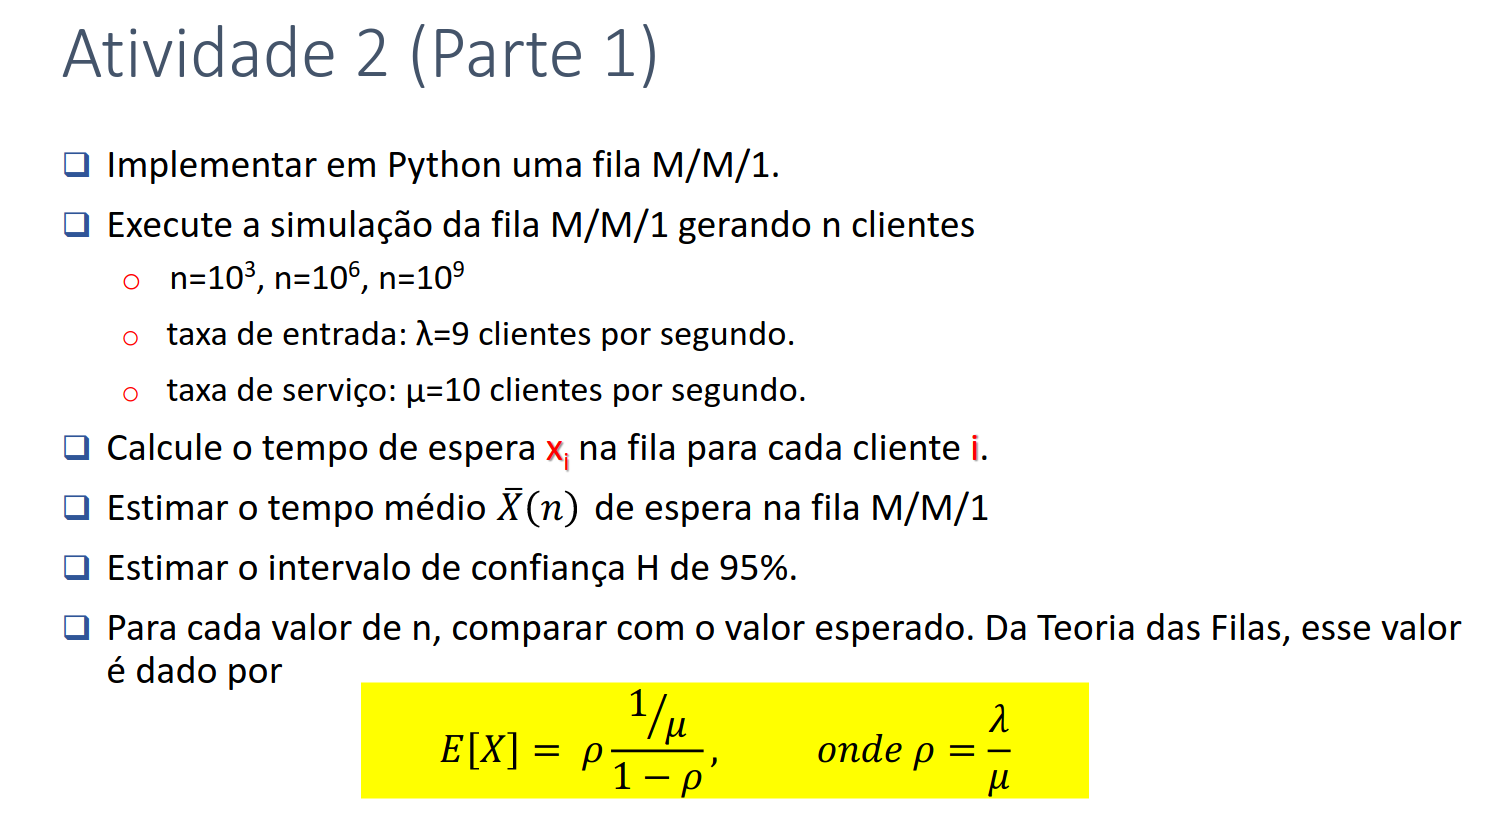

In [134]:
def G5(n):
    random.seed(0)

    vet_rn = []
    for i in range(0,n,1):
        vet_rn.append(random.random())
    
    return(np.array(vet_rn)) 

In [135]:
def random_list(vet,B):
    Ts = np.zeros(len(vet))
    for i in range(0,len(vet)):
        Ts[i] = -B*np.log(1-vet[i])
    return Ts

In [175]:
class MM1():
    def __init__(self, tx_service, tx_entry):
        self.DEBUG = 0
        self.total_clients_attended = 0
        self.clock = 0.0
        
        self.mean_wait = 0.0

        self.tx_service = tx_service
        self.tx_entry = tx_entry

    def process_queue(self):
        clock_history = []
        wait_time_history = []

        if( self.DEBUG == 1):
            print("Taxa Serviço: ",self.tx_service,"\n")
            print("Taxa Entrada: ",self.tx_entry,"\n")
        
        for i in range(0,len(self.tx_service)):
            if(self.DEBUG == 1):
                print(i, " - Clock: ", self.clock)

            client_service = self.tx_service[i]
            client_entry = self.tx_entry[i] 
            
            bff = client_entry - self.clock
    
            if(bff >= 0): self.clock += bff + client_service
            else: self.clock = client_service

            wait_time_history.append(bff)
        
        
        return np.array(wait_time_history)

In [176]:
def sum_intervals(vet):
    for i in range(1, len(vet)):
        vet[i] += vet[i-1]
    return vet

In [177]:
means = []
time_vector = []
exp = 3

for i in range(0,1):
	inicio = timeit.default_timer()

	N=10**exp
	random_arr = G5(N)

	U=1/10
	tx_service = random_list(random_arr,U)

	H=1/9
	tx_entry = random_list(random_arr,H)
	tx_entry[0] = 0
	tx_entry = sum_intervals(tx_entry)

	a = MM1(tx_service,tx_entry)
	wait_time_history = a.process_queue()
		
	fim = timeit.default_timer()

	means.append(np.mean(wait_time_history))
	time_vector.append(fim-inicio)

	if(exp == 6): exp += 2 
	else: exp += 3
    
print("Médias de tempo de espera: " , means , "\n" , "Tempos de execução: ", time_vector,"\n")

Médias de tempo de espera:  [20.279920171237087] 
 Tempos de execução:  [0.009302950998971937] 



In [178]:
#Calcular intervalo com 95%
print(np.mean(tx_service))

0.09847103403340554


In [86]:
def EX(H,U):
    p = H/U
    return p*((1/U)/(1-p))

def compare_EX(ex, wait_time):
    aux = [3,6,8]
    for i in range(0,len(wait_time)):
        if(ex != wait_time[i]):
            print("N = 10^", aux[i], "\nE[X]: ", ex, "\nTempo médio de espera: ",wait_time[i],"\nDiferença entre o Tempo e o E[X]:", wait_time[i] - ex, "\n")


In [87]:
H=9
U=10
ex=EX(H, U)
compare_EX(ex, means)

N = 10^ 3 
E[X]:  0.9000000000000002 
Tempo médio de espera:  6.171689898689175 
Diferença entre o Tempo e o E[X]: 5.271689898689175 

N = 10^ 6 
E[X]:  0.9000000000000002 
Tempo médio de espera:  5543.277337600793 
Diferença entre o Tempo e o E[X]: 5542.377337600793 



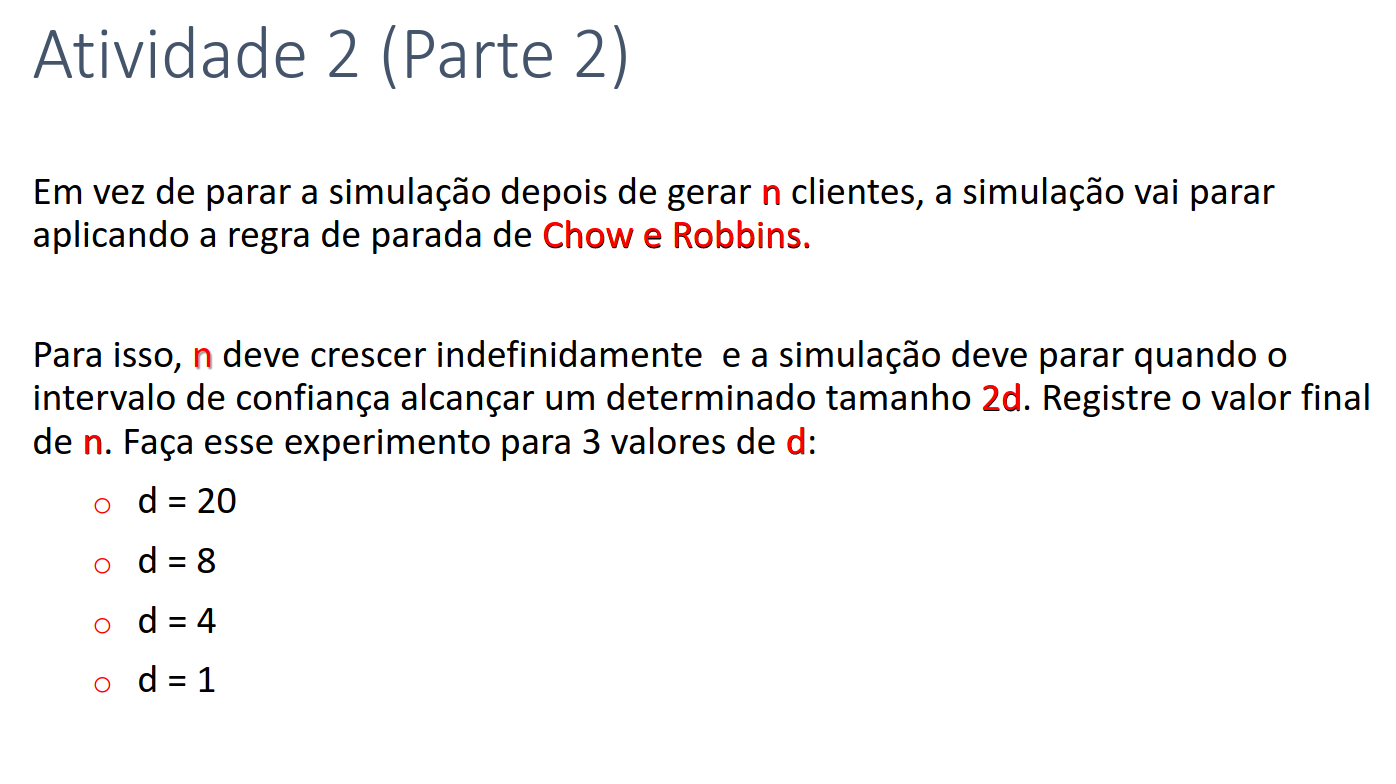

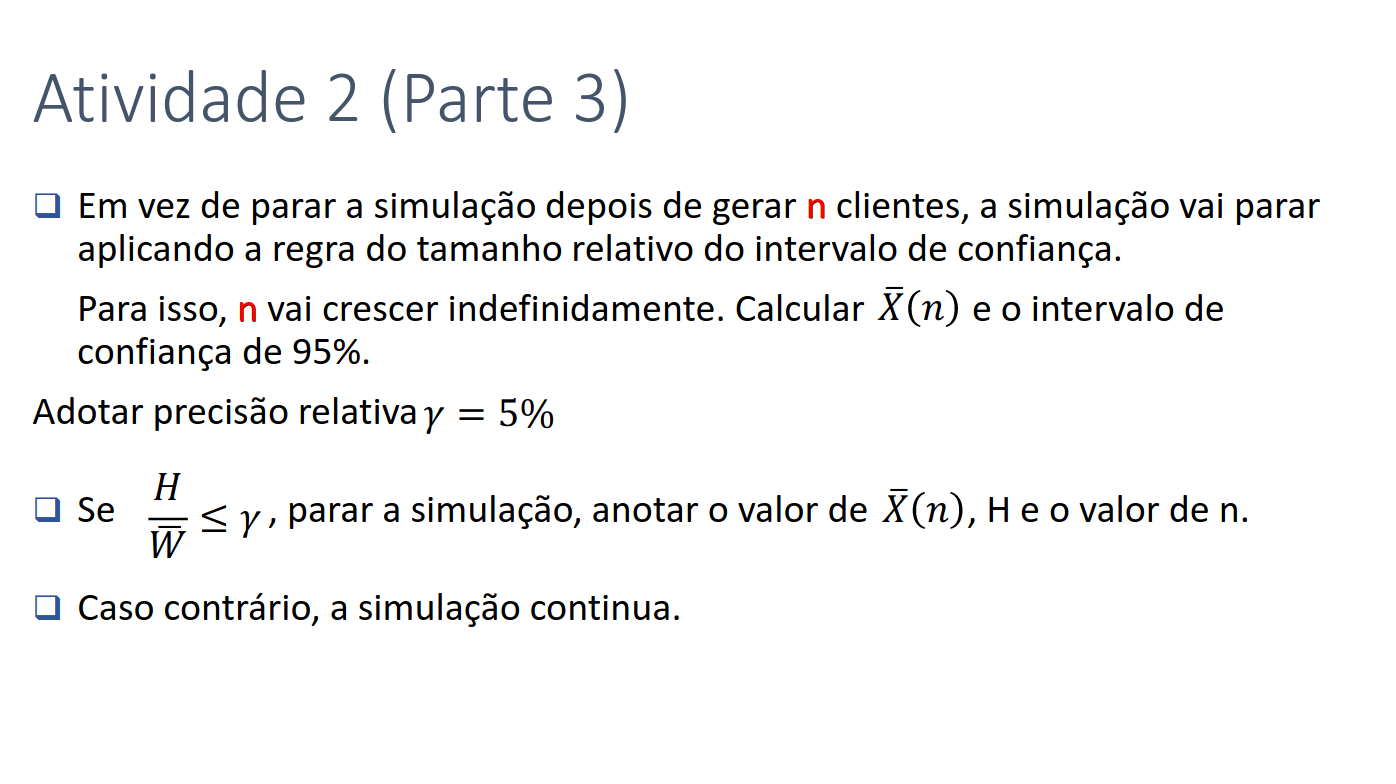

In [74]:
np.mean([1,2,3])

2.0

In [142]:
sum_intervals([1,2,3,4,5,6,7,8,9])

[1, 3, 6, 10, 15, 21, 28, 36, 45]